# Viz

In [453]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [454]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# charger df

In [598]:
df = pd.read_csv("df.csv", sep = ",")

In [599]:
#genreparannees = pd.read_csv("C:/Users/marie/Documents/Hackathon1/Df_Musique.csv", sep = ",")

In [600]:
#genreparannees['genre'].replace("Children’s Music", "Children's Music", inplace=True)

In [601]:
df['genre'].replace("Children’s Music", "Children's Music", inplace=True)

In [602]:
df.astype({"year" : "int"})

,genre,artist_name,track_name,popularity,danceability,duration_ms,energy,liveness,loudness,tempo,year
0,Movie,Debbie Davis,I'll Feel Much Better When You Cry,3,0.555,278160,0.773,0.0929,-5.438,120.070,2012
1,R&B,Layton Greene,Roll In Peace,60,0.523,170343,0.507,0.0774,-6.448,140.368,2018
2,R&B,Mariah Carey,Hero,71,0.501,257733,0.378,0.1190,-9.370,119.987,1993
3,R&B,Beyoncé,Flawless Remix,69,0.639,234413,0.659,0.4840,-7.273,136.801,2014
4,R&B,SZA,Childs Play (feat. Chance the Rapper),65,0.759,216234,0.342,0.1120,-9.044,99.995,2014
...,...,...,...,...,...,...,...,...,...,...,...
20216,Soul,Men I Trust,Sad Organ,40,0.723,110442,0.565,0.1210,-9.371,113.021,2015
20217,Soul,Sade,Jezebel - Remastered,42,0.357,326173,0.328,0.1340,-7.547,83.977,2011
20218,Soul,Theo Katzman,As the Romans Do,37,0.652,261142,0.721,0.1580,-5.556,80.523,2017
20219,Soul,Morgan Saint,Until the Day I Die,41,0.709,205533,0.686,0.0896,-6.240,121.955,2018


In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20221 entries, 0 to 20220
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         20221 non-null  object 
 1   artist_name   20221 non-null  object 
 2   track_name    20221 non-null  object 
 3   popularity    20221 non-null  int64  
 4   danceability  20221 non-null  float64
 5   duration_ms   20221 non-null  int64  
 6   energy        20221 non-null  float64
 7   liveness      20221 non-null  float64
 8   loudness      20221 non-null  float64
 9   tempo         20221 non-null  float64
 10  year          20221 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [604]:
#https://drive.google.com/drive/folders/1gBCoLw_8oXWW2g-Z58P76rBdh0YiP66T?usp=sharing

In [606]:
#genreparannees.head()

In [607]:
df.head()

,genre,artist_name,track_name,popularity,danceability,duration_ms,energy,liveness,loudness,tempo,year
0,Movie,Debbie Davis,I'll Feel Much Better When You Cry,3,0.555,278160,0.773,0.0929,-5.438,120.070,2012.0
1,R&B,Layton Greene,Roll In Peace,60,0.523,170343,0.507,0.0774,-6.448,140.368,2018.0
2,R&B,Mariah Carey,Hero,71,0.501,257733,0.378,0.1190,-9.370,119.987,1993.0
3,R&B,Beyoncé,Flawless Remix,69,0.639,234413,0.659,0.4840,-7.273,136.801,2014.0
4,R&B,SZA,Childs Play (feat. Chance the Rapper),65,0.759,216234,0.342,0.1120,-9.044,99.995,2014.0


# Genres

## Top 5 genres les + représentés

In [608]:
genres5 = df.groupby(["genre"]).count().reset_index().sort_values(by = "artist_name", ascending = False)[:5].iloc[:,:2]
genres5

,genre,artist_name
0,Alternative,1781
7,Dance,1632
9,Folk,1618
2,Blues,1560
10,Hip-Hop,1261


In [609]:
list_genres5 = ["Alternative", "Dance", "Folk", "Blues", "Hip-Hop"]
df_top5 = df[df["genre"].isin(list_genres5)]
df_top5

,genre,artist_name,track_name,popularity,danceability,duration_ms,energy,liveness,loudness,tempo,year
32,Alternative,Joji,Sanctuary,83,0.552,180019,0.650,0.3720,-7.199,167.788,2019.0
33,Alternative,Joji,SLOW DANCING IN THE DARK,81,0.515,209274,0.479,0.1910,-7.458,88.964,2018.0
34,Alternative,Joji,YEAH RIGHT,76,0.672,174358,0.588,0.0992,-9.573,169.033,2018.0
35,Alternative,Joji,CAN'T GET OVER YOU (feat. Clams Casino),74,0.900,107077,0.316,0.0853,-8.797,129.914,2018.0
36,Alternative,Grouplove,Tongue Tied,76,0.560,218013,0.936,0.1610,-5.835,112.960,2011.0
...,...,...,...,...,...,...,...,...,...,...,...
11482,Hip-Hop,A Tribe Called Quest,Conrad Tokyo,48,0.675,211987,0.608,0.1030,-7.233,95.245,2016.0
11483,Hip-Hop,Al James,Ngayong Gabi,64,0.865,267457,0.628,0.2000,-7.614,116.009,2017.0
11484,Hip-Hop,LunchMoney Lewis,Whip It!,57,0.739,242973,0.780,0.0973,-3.942,131.040,2015.0
11485,Hip-Hop,Compton's Most Wanted,Hood Took Me Under,53,0.774,219267,0.485,0.1070,-10.955,156.001,1992.0


In [610]:
df2 = df_top5.groupby(["genre"]).count().reset_index()
df2

,genre,artist_name,track_name,popularity,danceability,duration_ms,energy,liveness,loudness,tempo,year
0,Alternative,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781
1,Blues,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560
2,Dance,1632,1632,1632,1632,1632,1632,1632,1632,1632,1632
3,Folk,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618
4,Hip-Hop,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261


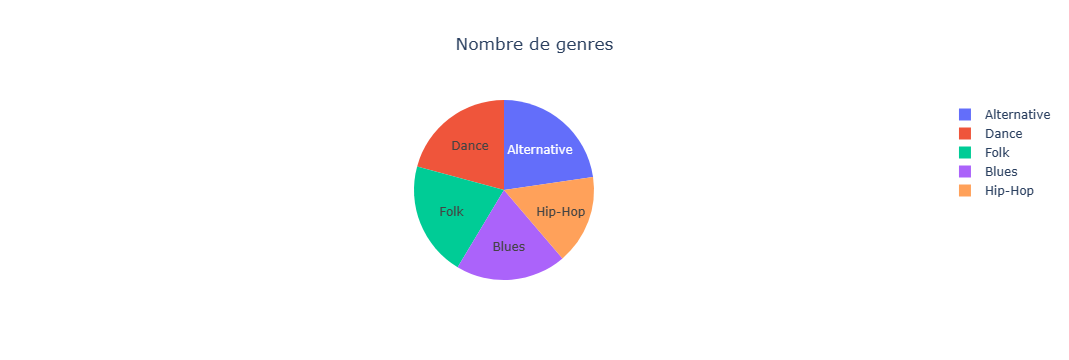

In [611]:
fig1 = px.pie(genres5, values='artist_name', names='genre', title='Nombre de genres')
fig1.update_traces(textposition='inside', textinfo='label')
fig1.update_layout(title={"x":0.5})
fig1.show()

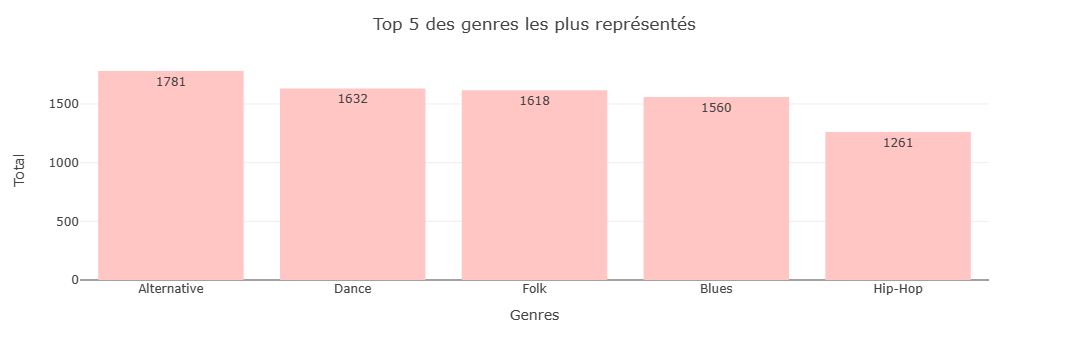

In [612]:
fig2 = px.histogram(df_top5, x = "genre", text_auto=True,
                   template="xgridoff",
            color_discrete_sequence= px.colors.sequential.Burg)

fig2.update_yaxes(title_text = "Total")
fig2.update_xaxes(title_text = "Genres")
fig2.update_layout(title = {"text" : "Top 5 des genres les plus représentés", "x":0.5})
fig2.show()

## top 10 des genres

In [613]:
genres10 = df.groupby(["genre"]).count().reset_index().sort_values(by = "artist_name", ascending = False)[:10].iloc[:,:2]
genres10

,genre,artist_name
0,Alternative,1781
7,Dance,1632
9,Folk,1618
2,Blues,1560
10,Hip-Hop,1261
6,Country,1150
23,Soundtrack,922
8,Electronic,872
4,Classical,863
1,Anime,832


In [614]:
list_genres10 = ["Alternative", "Dance", "Folk", "Blues", "Hip-Hop", "Country", "Soundtrack", "Soundtrack", "Electronic", "Classical", "Anime"]
df_top10 = df[df["genre"].isin(list_genres)]
df_top10

,genre,artist_name,track_name,popularity,danceability,duration_ms,energy,liveness,loudness,tempo,year
32,Alternative,Joji,Sanctuary,83,0.552,180019,0.650,0.3720,-7.199,167.788,2019.0
33,Alternative,Joji,SLOW DANCING IN THE DARK,81,0.515,209274,0.479,0.1910,-7.458,88.964,2018.0
34,Alternative,Joji,YEAH RIGHT,76,0.672,174358,0.588,0.0992,-9.573,169.033,2018.0
35,Alternative,Joji,CAN'T GET OVER YOU (feat. Clams Casino),74,0.900,107077,0.316,0.0853,-8.797,129.914,2018.0
36,Alternative,Grouplove,Tongue Tied,76,0.560,218013,0.936,0.1610,-5.835,112.960,2011.0
...,...,...,...,...,...,...,...,...,...,...,...
19354,Country,Waylon Jennings,The Year 2003 Minus 25 - Remastered,44,0.626,184267,0.457,0.0668,-13.785,102.166,1978.0
19355,Country,Jon Langston,Runnin' On Sunshine (feat. Jordan Rager),42,0.373,231944,0.760,0.1000,-5.629,162.009,2013.0
19356,Country,Johnny Cash,Jackson (with June Carter Cash),41,0.707,166267,0.483,0.3880,-9.929,128.320,1952.0
19357,Country,Johnny Cash,Tennessee Flat-Top Box,46,0.659,179147,0.724,0.3630,-8.175,97.544,1963.0


# tempo

In [615]:
df1 = df_top10.groupby(["genre"]).count().reset_index()
df1

,genre,artist_name,track_name,popularity,danceability,duration_ms,energy,liveness,loudness,tempo,year
0,Alternative,1781,1781,1781,1781,1781,1781,1781,1781,1781,1781
1,Anime,832,832,832,832,832,832,832,832,832,832
2,Blues,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560
3,Classical,863,863,863,863,863,863,863,863,863,863
4,Country,1150,1150,1150,1150,1150,1150,1150,1150,1150,1150
5,Dance,1632,1632,1632,1632,1632,1632,1632,1632,1632,1632
6,Electronic,872,872,872,872,872,872,872,872,872,872
7,Folk,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618
8,Hip-Hop,1261,1261,1261,1261,1261,1261,1261,1261,1261,1261
9,Soundtrack,922,922,922,922,922,922,922,922,922,922


In [616]:
fig3 = px.bar(df1,
             x='tempo',
             y='popularity', color = "genre",
            barmode='stack',
              template="xgridoff",
             labels={"tempo": "Tempo", "popularity" : "Popularité", "genre" : "Genres"})
fig3.update_layout(title = {"text" : "Popularité en fonction du tempo par genre", "x":0.5})
#mettre le plus possible
fig3.show(renderer="iframe")

# artist

In [617]:
artist = df.groupby(["artist_name"]).count().reset_index().sort_values(by = "genre", ascending = False)[:10].iloc[:,:2]
artist

,artist_name,genre
40,ASIAN KUNG-FU GENERATION,118
437,Bruce Faulconer,113
2776,Thievery Corporation,94
2489,Stephen Lynch,85
2450,Soda Stereo,83
381,Bob Dylan,77
15,311,76
317,Beyoncé,74
64,Adolphe Adam,70
1713,Ludwig van Beethoven,67


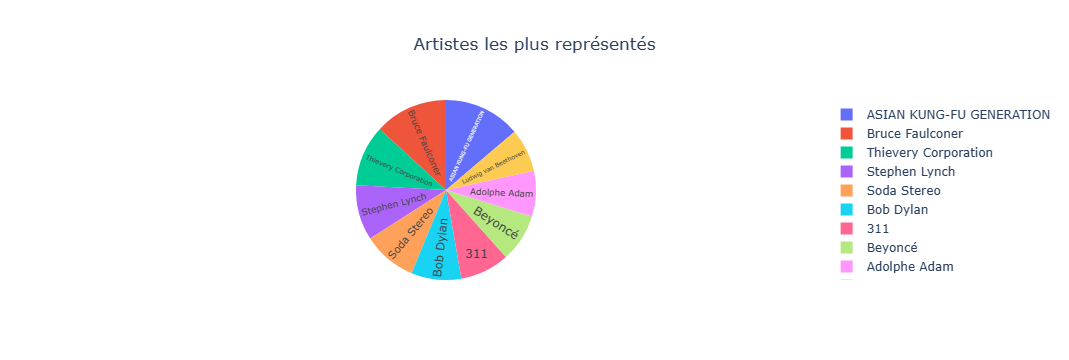

In [618]:
fig4 = px.pie(artist, values='genre', names='artist_name', title='Artistes les plus représentés')
fig4.update_traces(textposition='inside', textinfo='label')
fig4.update_layout(title={"x":0.5})
fig4.show()

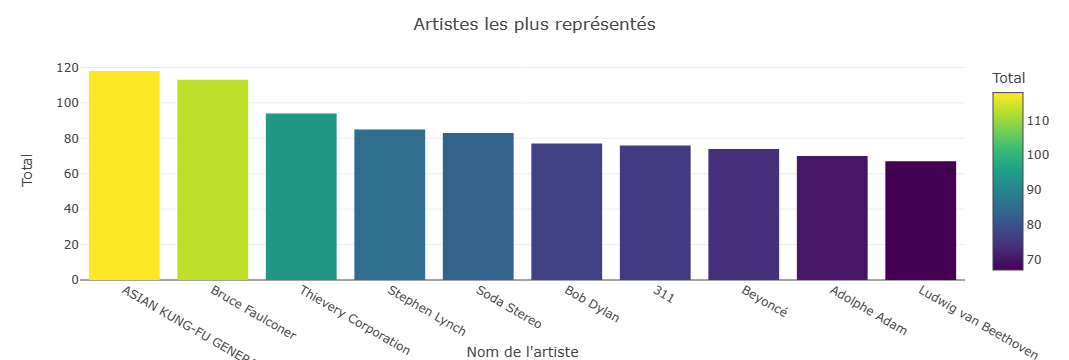

In [619]:
fig5 = px.bar(artist,
             x='artist_name',
             y='genre', color = "genre",
            barmode='stack',
              template="xgridoff",
             labels={"artist_name": "Nom de l'artiste", "genre" : "Total", "genre" : "Total"}
             )
fig5.update_layout(title = {"text" : "Artistes les plus représentés", "x":0.5})

fig5.show()

# danceability

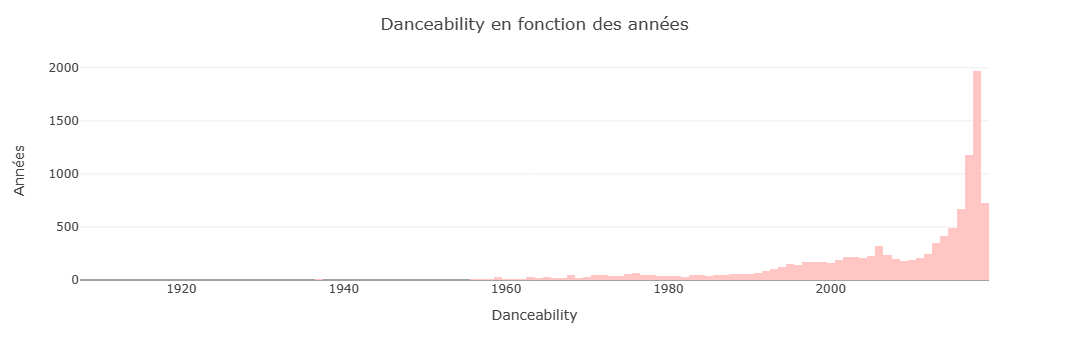

In [620]:
fig7 = px.histogram(df, x="year", y="danceability",
                    template="xgridoff",
                    color_discrete_sequence= px.colors.sequential.Burg,
                   #labels = {"year" : "Années", "danceability" : "Danceability"}
                   )

fig7.update_yaxes(title_text = "Années")
fig7.update_xaxes(title_text = "Danceability")
fig7.update_layout(title_text = "Danceability en fonction des années", title_x=0.5)
fig7.show()

# genre par decennie

In [595]:
#bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020, 2030]

In [596]:
#labels = ["1900", "1920", "1940", "1960", "1980", "2000", "2020", "2030"]

In [597]:
#genreparannees["year"] = pd.cut(genreparannees["year"], bins, labels)

In [579]:
#genreparannees

In [621]:
#df["decennies"] = (df["year"]//10) * 10

# genres les plus représentés

In [623]:
genres2 = df.groupby(["genre"]).count().reset_index().sort_values(by = "artist_name", ascending = False)[:].iloc[:,:2]
genres2

,genre,artist_name
0,Alternative,1781
7,Dance,1632
9,Folk,1618
2,Blues,1560
10,Hip-Hop,1261
6,Country,1150
23,Soundtrack,922
8,Electronic,872
4,Classical,863
1,Anime,832


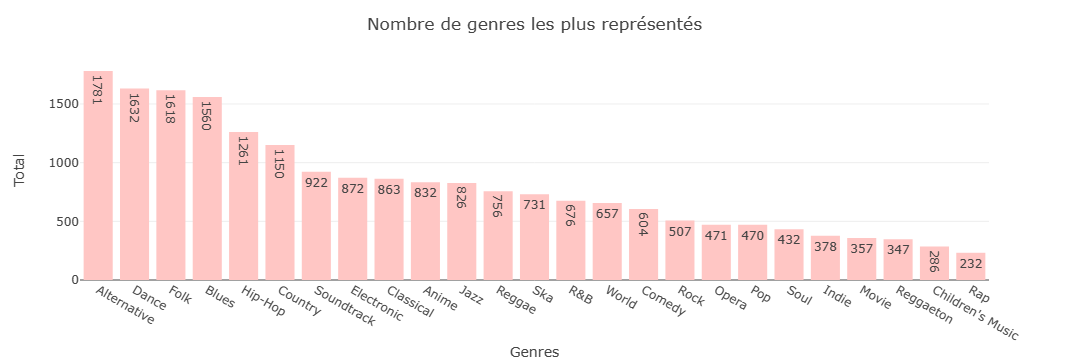

In [624]:
fig9 = px.histogram(genres2, x="genre", y ="artist_name", text_auto=True,
                   template="xgridoff",
                    color_discrete_sequence= px.colors.sequential.Burg,)

fig9.update_yaxes(title_text = "Total")
fig9.update_xaxes(title_text = "Genres")
fig9.update_layout(title_text = "Nombre de genres les plus représentés", title_x=0.5)
fig9.show()

# Sauvegarder

In [625]:
df.to_csv("df.csv", index = False)